<a href="https://colab.research.google.com/github/damyaoferreyra/transferlearning/blob/master/transfer_learning_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar o modelo completo treinado no ImageNet
# include_top=True carrega a camada final de 1.000 classes
model = MobileNetV2(weights='imagenet', include_top=True)

def identificar_imagem(caminho_da_imagem):
    # 2. Carregar e redimensionar a imagem para o tamanho que o modelo espera (224x224)
    img = image.load_img(caminho_da_imagem, target_size=(224, 224))

    # 3. Converter imagem em array numérico e preparar para o modelo
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # Criar o "batch" (1, 224, 224, 3)
    x = preprocess_input(x)       # Escala os pixels para [-1, 1]

    # 4. Fazer a predição
    preds = model.predict(x)

    # 5. Decodificar os resultados (pega o Top 3 mais prováveis)
    print('Resultado da Identificação:')
    for i, (imagenet_id, label, score) in enumerate(decode_predictions(preds, top=1)[0]):
        print(f"{i+1}: {label} ({score*100:.2f}%)")
        plt.imshow(image.load_img(caminho_da_imagem)) # Mostra a imagem original, não a de 32x32
        plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Resultado da Identificação:
1: golden_retriever (82.09%)


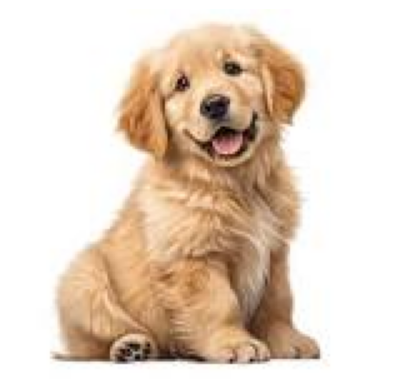

In [19]:
# identificando imagem
identificar_imagem('/content/images/gato03.jpg')